# Goal: Technology IT Industry Outlook 2025

1. Analyze macro trends driving the IT industry: cloud adoption, AI integration, cybersecurity, and edge computing.

2. Evaluate top players by revenue growth, innovation, and market influence across sub-sectors (SaaS, IaaS, cybersecurity, etc.).

3. Forecast investment priorities and R&D focus areas based on earnings calls, roadmaps, and M&A activity.

4. Identify regulatory, talent, and supply chain challenges shaping future risks and constraints.

5. Develop actionable insights for stakeholders on sector positioning, opportunities, and tech disruption over the next 3–5 years.

In [4]:
import yfinance as yf
import pandas as pd
import time

# List of top 25 IT/Software company ticker symbols
companies = [
    'AAPL',   # Apple Inc.
    'MSFT',   # Microsoft Corp.
    'GOOGL',  # Alphabet Inc. (Class A)
        'GOOG',  # Alphabet Inc. (Class A)
    'AMZN',   # Amazon.com Inc. (AWS is a major driver)
    'NVDA',   # NVIDIA Corp. (AI + software stack)
    'META',   # Meta Platforms Inc.
    'CRM',    # Salesforce Inc.
    'ORCL',   # Oracle Corp.
    'ADBE',   # Adobe Inc.
    'INTU',   # Intuit Inc.
    'CSCO',   # Cisco Systems Inc.
    'IBM',    # International Business Machines
    'SAP',    # SAP SE (traded as SAP on NYSE)
    'UBER',   # Uber Technologies (software-enabled platform)
    'SQ',     # Block Inc. (formerly Square)
    'NOW',    # ServiceNow Inc.
    'PANW',   # Palo Alto Networks
    'SNOW',   # Snowflake Inc.
    'ZS',     # Zscaler Inc.
    'DDOG',   # Datadog Inc.
    'MDB',    # MongoDB Inc.
    'PLTR',   # Palantir Technologies
    'WDAY',   # Workday Inc.
    'SHOP',   # Shopify Inc.
    'CDNS',   # Cadence Design Systems
]

# Define the metrics we want to collect
metrics = [
    'shortName', 'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
    'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees', 'industry',
    'longBusinessSummary', 'operatingMargins'
]

# Create an empty DataFrame to store the financial data
financial_data = pd.DataFrame(columns=['Company', 'last_traded_price', 'sales_margin_%'] + metrics)

# Pull financial data for each company and add it to the DataFrame
for ticker in companies:
    try:
        company = yf.Ticker(ticker)
        info = company.info
        hist = company.history(period='1d')  # Get last traded price

        # Create a row of data for each company, handling missing 'shortName' keys
        row = {metric: info.get(metric, 'N/A') for metric in metrics}
        row['Company'] = info.get('shortName', ticker)  # Use the ticker symbol if 'shortName' is missing

        # Get last traded price (closing price)
        row['last_traded_price'] = hist['Close'].values[0] if not hist.empty else 'N/A'

        # Calculate sales margin % (operating margin * 100)
        row['sales_margin_%'] = f"{info.get('operatingMargins', 0) * 100:.2f}%" if info.get('operatingMargins') else 'N/A'

        # Append the row to the DataFrame using pd.concat, ensuring the row is not empty
        if any(value != 'N/A' for value in row.values()):  # Check if at least one value is not 'N/A'
            financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)

        # Delay to avoid rate-limiting issues
        time.sleep(2)  # 2 seconds delay between requests

    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

# Convert marketCap to numeric values and handle missing data
financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Sort the DataFrame by marketCap in descending order
#financial_data = financial_data.sort_values(by='marketCap', ascending=False)
financial_data = financial_data.sort_values(by='Company', ascending=True)

# Format marketCap as currency (e.g., $100B)
financial_data['marketCap'] = financial_data['marketCap'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')

# Display the sorted and formatted DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
display(financial_data)

# Optional: Save the DataFrame to a CSV file
#financial_data.to_csv('top_33_healthcare_companies_sorted_financials.csv', index=False)


<ipython-input-4-e48cae7a5d33>:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)
ERROR:yfinance:$SQ: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")


,Company,last_traded_price,sales_margin_%,shortName,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,revenue,grossProfits,freeCashflow,fullTimeEmployees,industry,longBusinessSummary,operatingMargins
9,Adobe Inc.,407.690002,37.85%,Adobe Inc.,"$173,757,480,960",26.945803,19.83893,13.543168,N/A,N/A,19647000576,8357374976,30709,Software - Application,"Adobe Inc., together with its subsidiaries, op...",0.37854
2,Alphabet Inc.,168.470001,33.92%,Alphabet Inc.,"$2,050,448,293,888",18.802456,18.802456,5.930998,0.5,N/A,210757992448,60679000064,185719,Internet Content & Information,Alphabet Inc. offers various products and plat...,0.33918
3,Alphabet Inc.,169.589996,33.92%,Alphabet Inc.,"$2,050,461,794,304",18.948603,18.948603,5.970428,0.5,N/A,210757992448,60679000064,185719,Internet Content & Information,Alphabet Inc. offers various products and plat...,0.33918
4,"Amazon.com, Inc.",200.990005,11.82%,"Amazon.com, Inc.","$2,133,790,294,016",32.78793,32.6813,6.973977,N/A,N/A,319681986560,39273500672,1560000,Internet Retail,"Amazon.com, Inc. engages in the retail sale of...",0.11823
0,Apple Inc.,195.270004,31.03%,Apple Inc.,"$2,916,513,742,848",30.415888,23.498194,43.674793,0.53,N/A,186699005952,97251500032,164000,Consumer Electronics,"Apple Inc. designs, manufactures, and markets ...",0.31029
25,"Cadence Design Systems, Inc.",315.51001,29.09%,"Cadence Design Systems, Inc.","$86,147,481,600",80.07868,46.059856,18.036358,N/A,N/A,4185089024,1264132736,12837,Software - Application,"Cadence Design Systems, Inc. provides software...",0.29091
11,"Cisco Systems, Inc.",63.110001,23.29%,"Cisco Systems, Inc.","$249,915,604,992",25.759184,16.18205,5.440517,2.6,N/A,36290998272,11596375040,90400,Communication Equipment,"Cisco Systems, Inc. designs, manufactures, and...",0.23295
20,"Datadog, Inc.",114.459999,-1.63%,"Datadog, Inc.","$39,529,103,360",243.5319,56.384235,13.53595,N/A,N/A,2271953920,791019904,6500,Software - Application,"Datadog, Inc. operates an observability and se...",-0.01631
12,International Business Machines,258.630005,12.40%,International Business Machines,"$240,369,942,528",44.21026,24.376062,8.942327,2.6,N/A,35840000000,10564249600,270300,Information Technology Services,"International Business Machines Corporation, t...",0.12399
10,Intuit Inc.,720.130005,15.70%,Intuit Inc.,"$200,878,112,768",58.834152,32.394512,9.986133,0.58,N/A,14595000320,5197749760,18800,Software - Application,"Intuit Inc. provides financial management, com...",0.15697


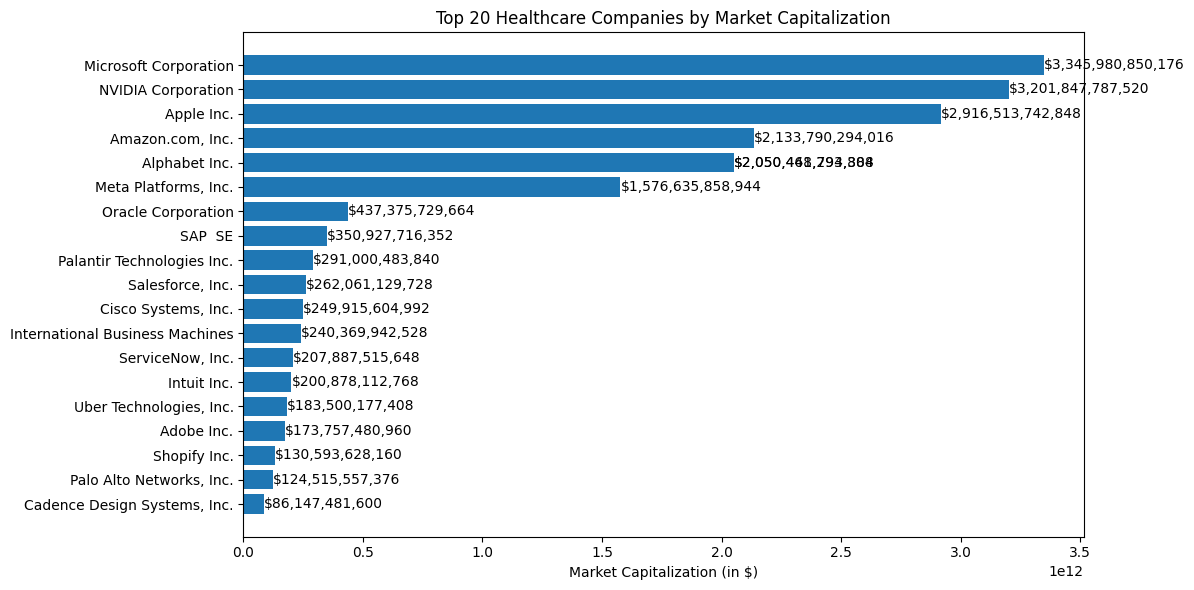

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out rows where marketCap is 'N/A' or missing
financial_data = financial_data[financial_data['marketCap'].notna()]
financial_data = financial_data[financial_data['marketCap'] != 'N/A']

# Convert marketCap to numeric, after stripping '$' and ','
# financial_data['marketCap'] = financial_data['marketCap'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Sort by marketCap descending and take the top 20
top_companies = financial_data.sort_values(by='marketCap', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], top_companies['marketCap'])

# Annotate bars with market cap values
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${top_companies['marketCap'].iloc[index]:,.0f}", va='center')

# Axis labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 20 Healthcare Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Largest at top

plt.tight_layout()
plt.show()


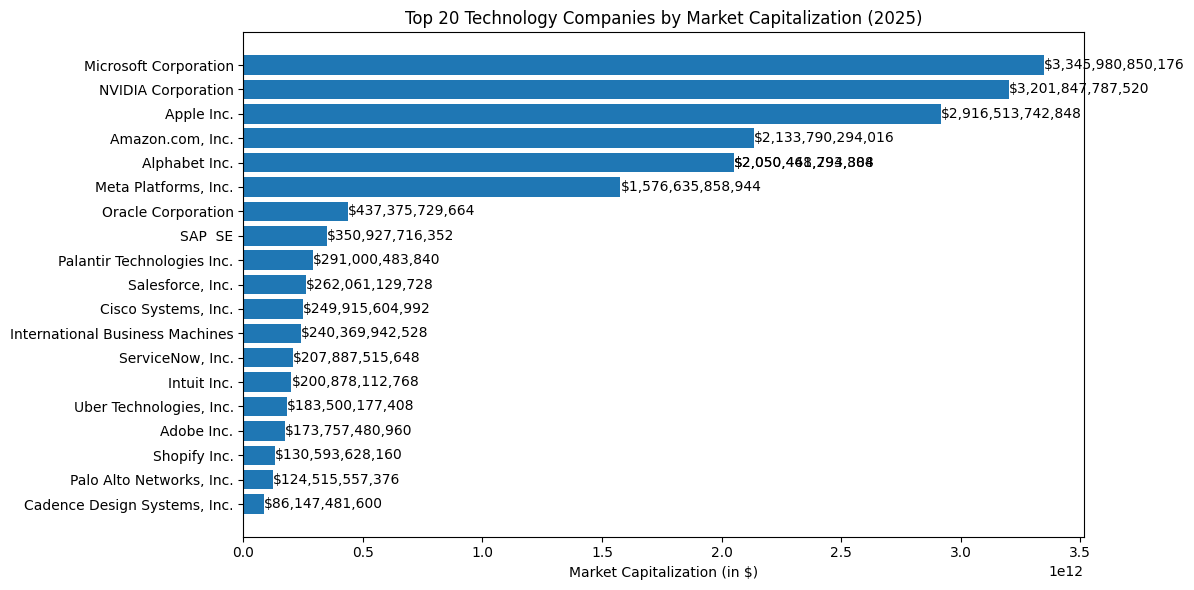

In [11]:
# Convert the marketCap column to numeric for sorting
financial_data['marketCap_numeric'] = financial_data['marketCap'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Sort by marketCap and take the top 20 companies
top_companies = financial_data.sort_values(by='marketCap_numeric', ascending=False).head(20)

# Use the sorted numeric market caps for plotting
market_caps = top_companies['marketCap_numeric']

# Plot a bar chart for the top 20 companies by market capitalization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], market_caps)

# Add the market capitalization values on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${market_caps.iloc[index]:,.0f}", va='center')

# Set labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 20 Technology Companies by Market Capitalization (2025)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest company at the top

# Display the plot
plt.tight_layout()
plt.grid(False)           # <<< Add this to remove the dotted line
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Drop any rows where fullTimeEmployees is 'N/A' and convert the column to numeric
# employee_data = financial_data[financial_data['fullTimeEmployees'] != 'N/A']
# employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')

# # Take the top 10 companies with the highest number of employees
# top_employers = employee_data.nlargest(10, 'fullTimeEmployees')

# # Function to display both percentage and number of employees in each pie chart slice
# def pie_label_func(pct, all_values):
#     absolute = int(np.round(pct / 100. * np.sum(all_values)))
#     return f"{pct:.1f}%\n({absolute:,})"

# # Plot a pie chart
# plt.figure(figsize=(9, 9))
# plt.pie(
#     top_employers['fullTimeEmployees'],
#     labels=top_employers['Company'],
#     autopct=lambda pct: pie_label_func(pct, top_employers['fullTimeEmployees']),
#     startangle=140
# )
# plt.title('Distribution of Full-Time Employees in Top 10 Healthcare Companies')
# plt.tight_layout()
# plt.show()


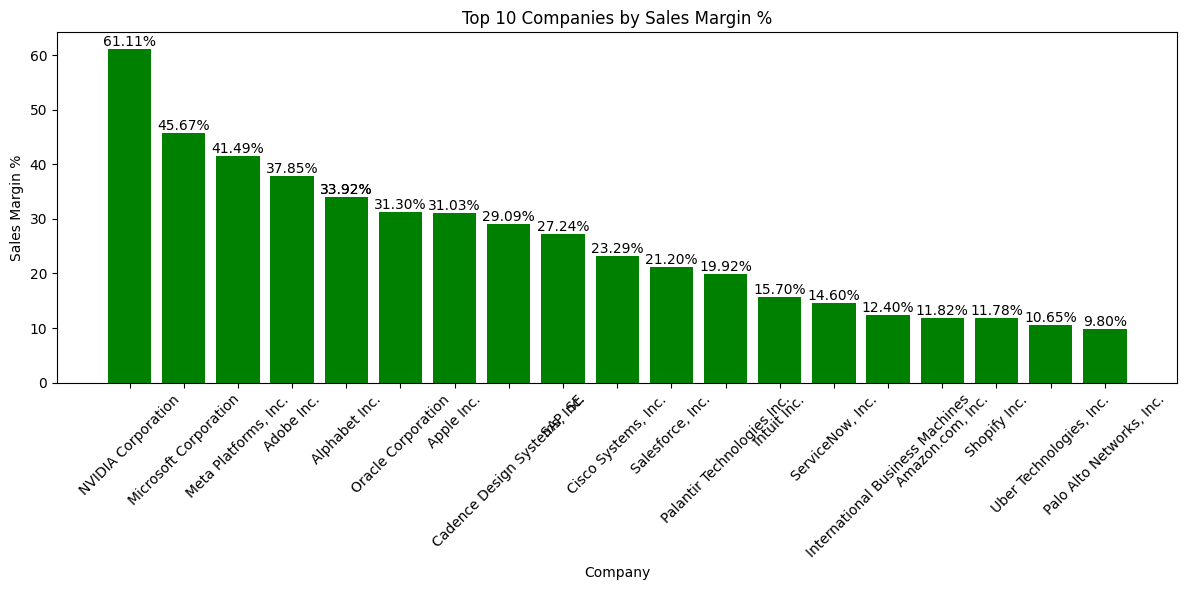

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'N/A' is replaced with NaN and convert sales_margin_% to string type first
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan)

# Convert only valid string entries, ignoring NaN, and strip the '%' symbol
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].apply(
    lambda x: str(x).rstrip('%') if isinstance(x, str) else x
).astype('float')

# Take the top 10 companies based on sales margin %
top_sales_margin = financial_data.nlargest(20, 'sales_margin_%')

# Plot a bar chart with expanded x-axis
plt.figure(figsize=(12, 6))  # Expand the width of the figure for better readability
bars = plt.bar(top_sales_margin['Company'], top_sales_margin['sales_margin_%'], color='green')

# Add labels to the bars to show the exact values of sales margin %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Sales Margin %')
plt.title('Top 10 Companies by Sales Margin %')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent labels from being cut off
plt.show()


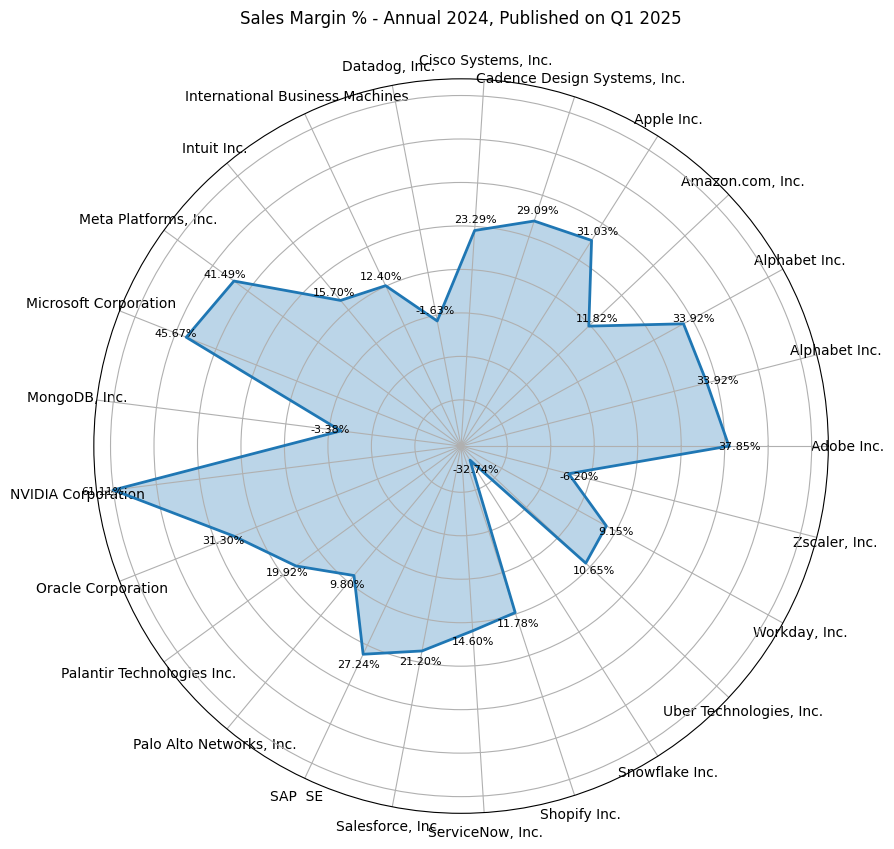

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with a 'Company' and 'sales_margin_%' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'sales_margin_%']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
# df['sales_margin_%'] = df['sales_margin_%'].replace('N/A', np.nan).str.replace('%', '')
df['sales_margin_%'] = pd.to_numeric(df['sales_margin_%'], errors='coerce').fillna(0)

# Step 3: Normalize the Sales Margin % for the radar chart
max_sales_margin = df['sales_margin_%'].max()
df['normalized_sales_margin'] = df['sales_margin_%'] / max_sales_margin

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_sales_margin'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Plot the normalized sales margin for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Sales Margin % (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each sales margin percentage
for i, (angle, value, margin) in enumerate(zip(angles, values, df['sales_margin_%'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{margin:.2f}%", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title("Sales Margin % - Annual 2024, Published on Q1 2025", pad=40)

# Show the plot
plt.tight_layout()
plt.show()


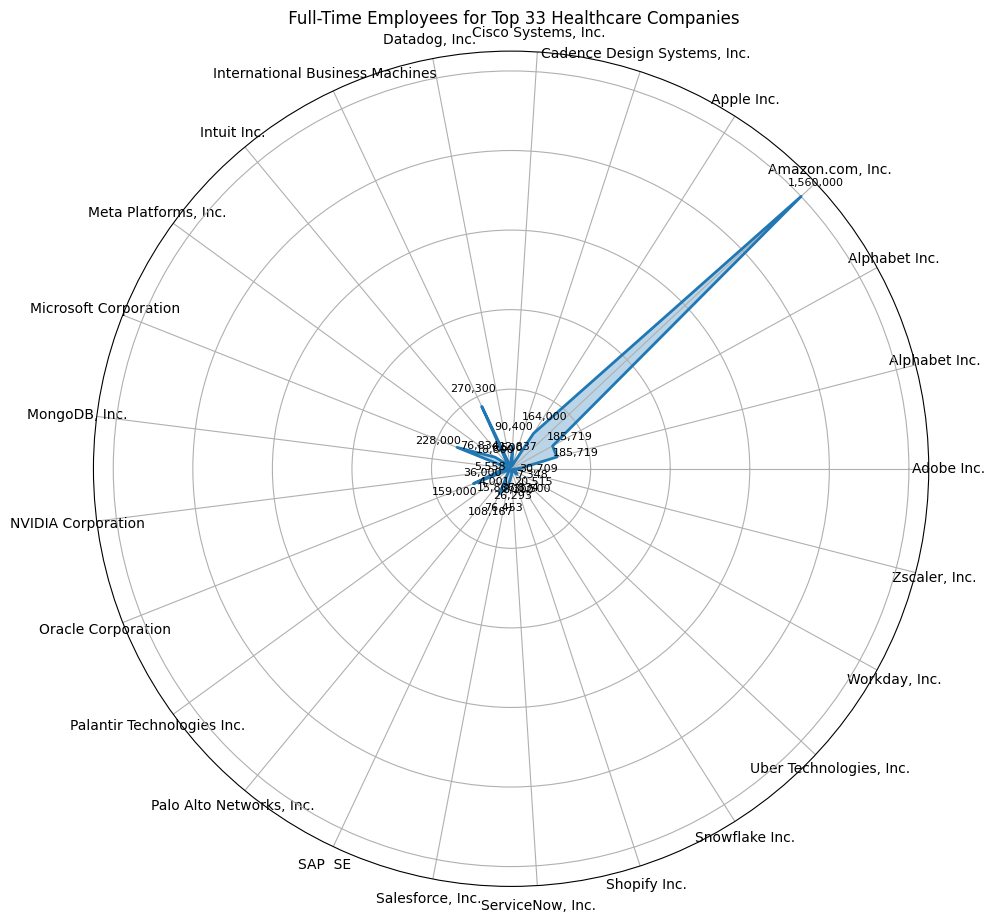

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with 'Company' and 'fullTimeEmployees' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'fullTimeEmployees']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
df['fullTimeEmployees'] = pd.to_numeric(df['fullTimeEmployees'], errors='coerce').fillna(0)

# Step 3: Normalize the full-time employees for the radar chart
max_employees = df['fullTimeEmployees'].max()
df['normalized_employees'] = df['fullTimeEmployees'] / max_employees

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_employees'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized full-time employees for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Full-Time Employees (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each full-time employee count
for i, (angle, value, employee_count) in enumerate(zip(angles, values, df['fullTimeEmployees'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{int(employee_count):,}", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title(" Full-Time Employees for Top 33 Healthcare Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Check if 'marketCap' column is not already numeric, and convert if necessary
if financial_data['marketCap'].dtype != 'float64' and financial_data['marketCap'].dtype != 'int64':
    # Remove any non-numeric characters if needed
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'].str.replace('[\$,]', '', regex=True), errors='coerce')
else:
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Similarly, ensure 'fullTimeEmployees' is numeric
financial_data['fullTimeEmployees'] = pd.to_numeric(financial_data['fullTimeEmployees'], errors='coerce')

# Drop rows with missing values in 'marketCap' or 'fullTimeEmployees' for accuracy in sums
financial_data = financial_data.dropna(subset=['marketCap', 'fullTimeEmployees'])

# Group by industry and calculate the total market cap and headcount per industry
industry_summary = financial_data.groupby('industry').agg(
    total_market_cap=pd.NamedAgg(column='marketCap', aggfunc='sum'),
    total_headcount=pd.NamedAgg(column='fullTimeEmployees', aggfunc='sum')
).reset_index()

# Calculate overall totals
total_market_cap = industry_summary['total_market_cap'].sum()
total_headcount = industry_summary['total_headcount'].sum()

# Add percentage splits for market cap and headcount for each industry
industry_summary['market_cap_%'] = (industry_summary['total_market_cap'] / total_market_cap) * 100
industry_summary['headcount_%'] = (industry_summary['total_headcount'] / total_headcount) * 100

# Sort by 'total_market_cap' in descending order
industry_summary = industry_summary.sort_values(by='total_market_cap', ascending=False)

# Format 'total_market_cap' as currency (e.g., "$100B") and 'total_headcount' with commas
industry_summary['total_market_cap'] = industry_summary['total_market_cap'].apply(lambda x: f"${x / 1e9:,.2f}B")
industry_summary['total_headcount'] = industry_summary['total_headcount'].apply(lambda x: f"{x:,.0f}")

# Add overall totals as the last row
overall_totals = pd.DataFrame({
    'industry': ['Total'],
    'total_market_cap': [f"${total_market_cap / 1e9:,.2f}B"],
    'total_headcount': [f"{total_headcount:,.0f}"],
    'market_cap_%': [100.0],
    'headcount_%': [100.0]
})

# Append overall totals to the summary DataFrame
industry_summary = pd.concat([industry_summary, overall_totals], ignore_index=True)

# Rename columns to replace 'headcount' with 'workforce'
industry_summary = industry_summary.rename(columns={
    'total_headcount': 'total_workforce',
    'headcount_%': 'workforce_%'
})

# Display the result
pd.options.display.float_format = '{:,.2f}'.format
display(industry_summary)

,industry,total_market_cap,total_workforce,market_cap_%,workforce_%
0,Internet Content & Information,"$5,677.55B","448,272",27.78,13.44
1,Software - Infrastructure,"$4,253.37B","419,773",20.81,12.58
2,Semiconductors,"$3,201.85B","36,000",15.67,1.08
3,Consumer Electronics,"$2,916.51B","164,000",14.27,4.92
4,Internet Retail,"$2,133.79B","1,560,000",10.44,46.76
5,Software - Application,"$1,765.69B","347,728",8.64,10.42
6,Communication Equipment,$249.92B,"90,400",1.22,2.71
7,Information Technology Services,$240.37B,"270,300",1.18,8.10
8,Total,"$20,439.05B","3,336,473",100.00,100.00


Error fetching data for SQ: 'Total Revenue'


<ipython-input-18-b2aba71cd27e>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")


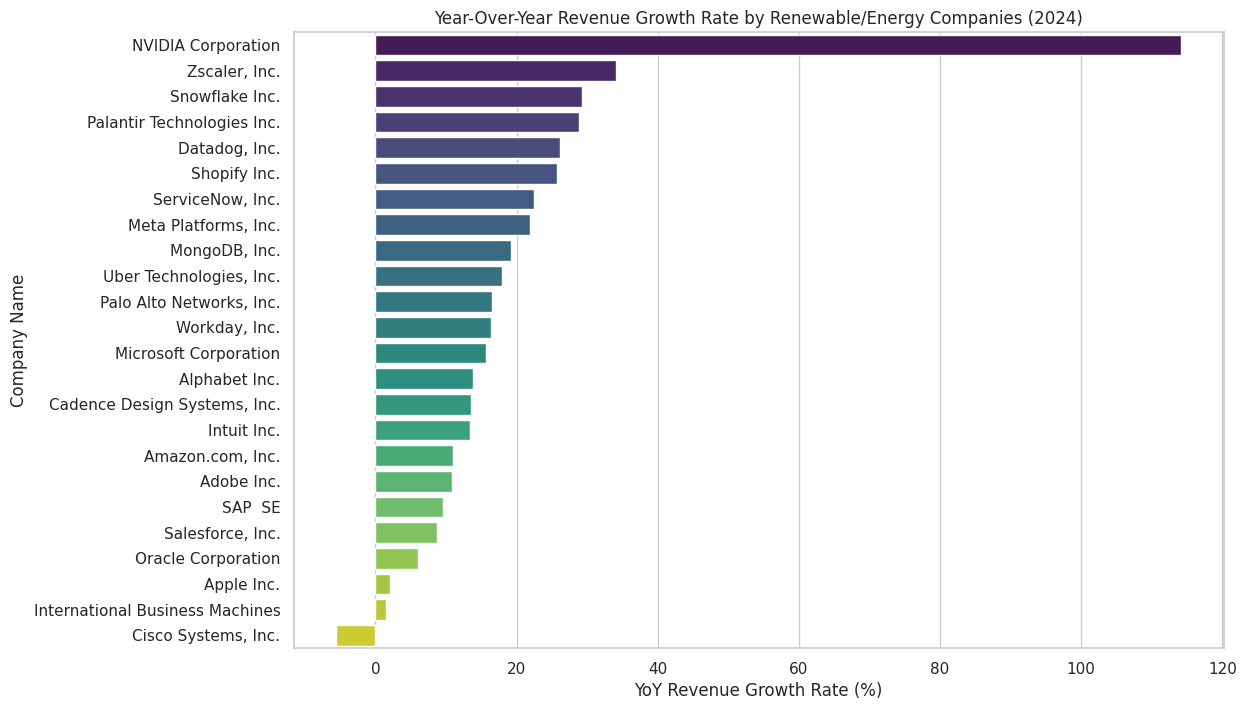

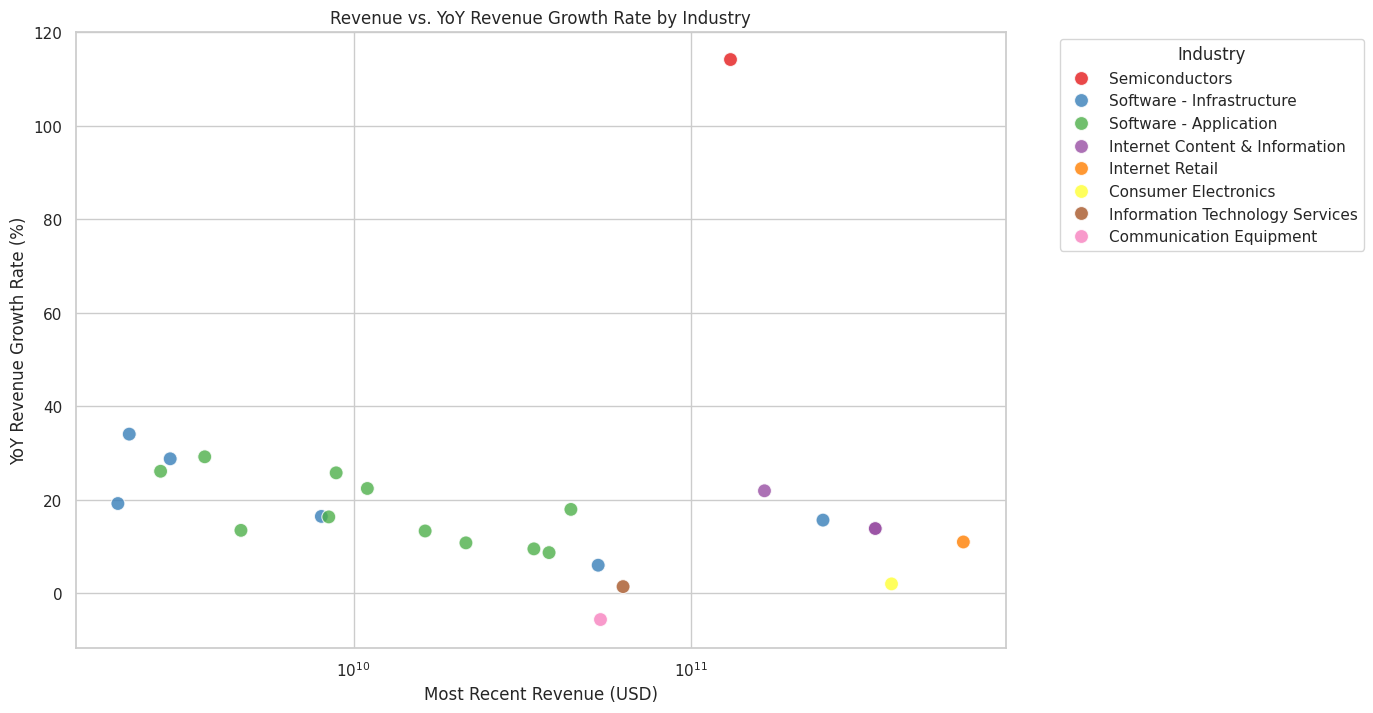

<ipython-input-18-b2aba71cd27e>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")


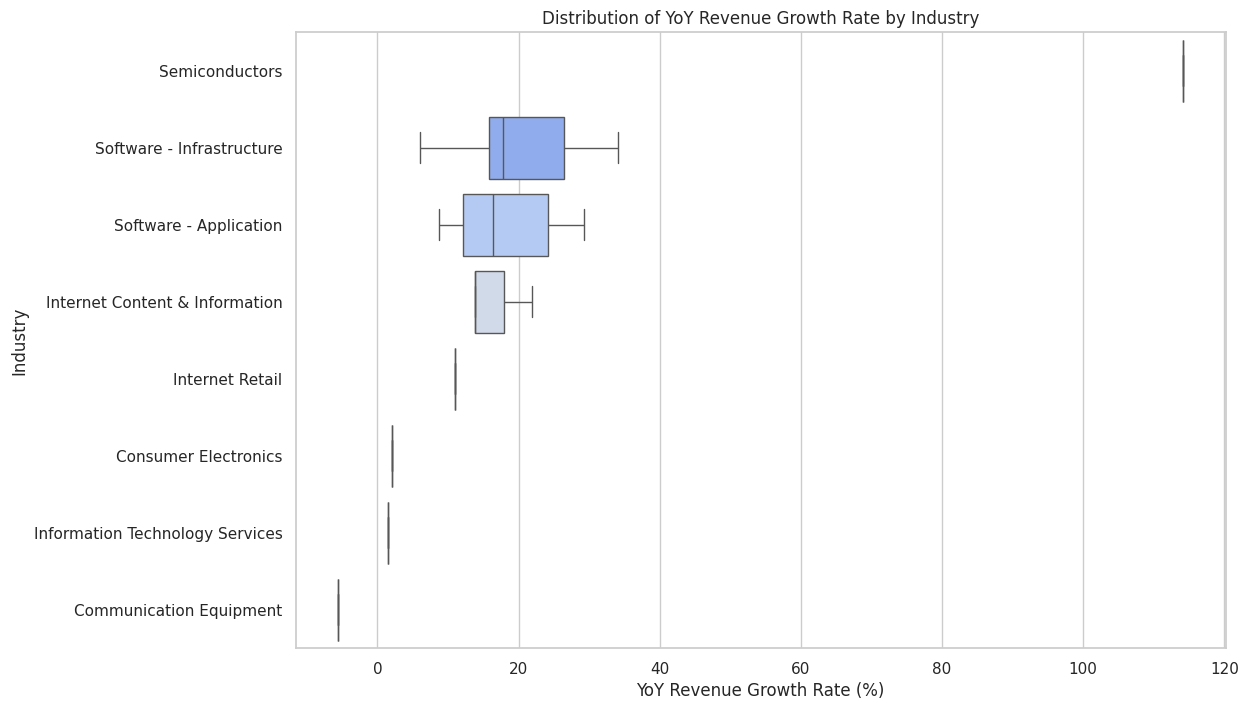

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn style for advanced visualization
sns.set(style="whitegrid")

# Sample data preparation (use the data prepared in the previous steps)
companies = [
    'AAPL',   # Apple Inc.
    'MSFT',   # Microsoft Corp.
    'GOOGL',  # Alphabet Inc. (Class A)
        'GOOG',  # Alphabet Inc. (Class A)
    'AMZN',   # Amazon.com Inc. (AWS is a major driver)
    'NVDA',   # NVIDIA Corp. (AI + software stack)
    'META',   # Meta Platforms Inc.
    'CRM',    # Salesforce Inc.
    'ORCL',   # Oracle Corp.
    'ADBE',   # Adobe Inc.
    'INTU',   # Intuit Inc.
    'CSCO',   # Cisco Systems Inc.
    'IBM',    # International Business Machines
    'SAP',    # SAP SE (traded as SAP on NYSE)
    'UBER',   # Uber Technologies (software-enabled platform)
    'SQ',     # Block Inc. (formerly Square)
    'NOW',    # ServiceNow Inc.
    'PANW',   # Palo Alto Networks
    'SNOW',   # Snowflake Inc.
    'ZS',     # Zscaler Inc.
    'DDOG',   # Datadog Inc.
    'MDB',    # MongoDB Inc.
    'PLTR',   # Palantir Technologies
    'WDAY',   # Workday Inc.
    'SHOP',   # Shopify Inc.
    'CDNS',   # Cadence Design Systems
]

# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)
        # Fetch company info for name and industry
        company_info = stock.info
        company_name = company_info.get("shortName", "N/A")
        industry = company_info.get("industry", "N/A")

        # Fetch annual financial data as a DataFrame
        annual_financials = stock.financials

        # Get Revenue for the last two years and the corresponding years
        recent_revenue = annual_financials.loc['Total Revenue'][:2]
        recent_years = recent_revenue.index[:2]

        # Calculate Revenue Growth Rate if there are at least two years of data
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue.iloc[0] - recent_revenue.iloc[1]) / recent_revenue.iloc[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list
        data.append({
            'Ticker': ticker,
            'Company Name': company_name,
            'Industry': industry,
            'Most Recent Revenue': recent_revenue.iloc[0] if len(recent_revenue) > 0 else None,
            'Previous Year Revenue': recent_revenue.iloc[1] if len(recent_revenue) > 1 else None,
            'YoY Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Drop rows with missing growth rates for visualizations
df = df.dropna(subset=['YoY Revenue Growth Rate (%)'])

# Sort by 'YoY Revenue Growth Rate (%)' in descending order
df = df.sort_values(by='YoY Revenue Growth Rate (%)', ascending=False)

### Visualization 1: Bar Chart of YoY Revenue Growth Rate
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")
plt.title('Year-Over-Year Revenue Growth Rate by Renewable/Energy Companies (2024)')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Company Name')
plt.show()

### Visualization 2: Scatter Plot of Revenue vs. YoY Growth Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Most Recent Revenue', y='YoY Revenue Growth Rate (%)', hue='Industry', palette="Set1", s=100, edgecolor="w", alpha=0.8)
plt.title('Revenue vs. YoY Revenue Growth Rate by Industry')
plt.xlabel('Most Recent Revenue (USD)')
plt.ylabel('YoY Revenue Growth Rate (%)')
plt.xscale('log')  # Log scale to manage large revenue range
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualization 3: Box Plot of YoY Revenue Growth by Industry
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")
plt.title('Distribution of YoY Revenue Growth Rate by Industry')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Industry')
plt.show()